In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import datetime
from pandas_datareader import data, wb

In [2]:
df = pd.read_csv('beatles.csv')

In [3]:
df.dtypes

Unnamed: 0              int64
Title                  object
Released               object
Label                  object
UK Chart Position     float64
US Chart Position     float64
BPI Certification      object
RIAA Certification     object
Count Songs             int64
Year                    int64
dtype: object

In [4]:
df = pd.read_csv('beatles.csv', converters={'Released': parse})

In [5]:
df.dtypes

Unnamed: 0                     int64
Title                         object
Released              datetime64[ns]
Label                         object
UK Chart Position            float64
US Chart Position            float64
BPI Certification             object
RIAA Certification            object
Count Songs                    int64
Year                           int64
dtype: object

In [6]:
dates = ['10-10-2015', '9/8/2012', '2/2014', 'Sep 17, 2000', 'foo']
ser = pd.Series(pd.to_datetime(dates, errors='coerce'))

In [7]:
ser

0   2015-10-10
1   2012-09-08
2   2014-02-01
3   2000-09-17
4          NaT
dtype: datetime64[ns]

In [8]:
ser.dt

In [9]:
ser.dt.year

0    2015.0
1    2012.0
2    2014.0
3    2000.0
4       NaN
dtype: float64

In [10]:
ser.dt.month

0    10.0
1     9.0
2     2.0
3     9.0
4     NaN
dtype: float64

In [11]:
ser.dt.hour

0    0.0
1    0.0
2    0.0
3    0.0
4    NaN
dtype: float64

### Window Functions

In [12]:
idx = pd.date_range('1/1/2000', periods=500, freq='d')

In [13]:
idx

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2001-05-05', '2001-05-06', '2001-05-07', '2001-05-08',
               '2001-05-09', '2001-05-10', '2001-05-11', '2001-05-12',
               '2001-05-13', '2001-05-14'],
              dtype='datetime64[ns]', length=500, freq='D')

In [14]:
ser = pd.Series(np.random.randn(len(idx)), index=idx)

In [15]:
ser

2000-01-01   -0.306307
2000-01-02   -0.435708
2000-01-03   -1.535846
2000-01-04    0.409924
2000-01-05   -0.666694
2000-01-06   -0.480828
2000-01-07    0.379973
2000-01-08   -0.773511
2000-01-09    0.396353
2000-01-10   -0.294093
2000-01-11    0.442196
2000-01-12   -1.519349
2000-01-13   -0.649513
2000-01-14   -2.263706
2000-01-15   -0.340966
2000-01-16    0.435463
2000-01-17   -1.666545
2000-01-18    1.452651
2000-01-19   -0.037077
2000-01-20    0.538926
2000-01-21   -0.042326
2000-01-22   -0.227057
2000-01-23    1.024661
2000-01-24   -0.687116
2000-01-25    1.405593
2000-01-26   -0.144300
2000-01-27    0.630102
2000-01-28    0.064640
2000-01-29   -0.376007
2000-01-30    0.017697
                ...   
2001-04-15   -1.672253
2001-04-16   -1.820955
2001-04-17    0.589024
2001-04-18   -0.212713
2001-04-19    2.062938
2001-04-20   -0.318086
2001-04-21   -0.284368
2001-04-22    0.135038
2001-04-23   -0.435896
2001-04-24    1.432767
2001-04-25   -0.775905
2001-04-26    0.086192
2001-04-27 

In [16]:
ser2 = ser + ser.shift(2)

In [17]:
ser2

2000-01-01         NaN
2000-01-02         NaN
2000-01-03   -1.842153
2000-01-04   -0.025784
2000-01-05   -2.202540
2000-01-06   -0.070904
2000-01-07   -0.286721
2000-01-08   -1.254338
2000-01-09    0.776326
2000-01-10   -1.067604
2000-01-11    0.838549
2000-01-12   -1.813442
2000-01-13   -0.207317
2000-01-14   -3.783055
2000-01-15   -0.990478
2000-01-16   -1.828243
2000-01-17   -2.007510
2000-01-18    1.888114
2000-01-19   -1.703621
2000-01-20    1.991577
2000-01-21   -0.079402
2000-01-22    0.311869
2000-01-23    0.982335
2000-01-24   -0.914173
2000-01-25    2.430253
2000-01-26   -0.831416
2000-01-27    2.035695
2000-01-28   -0.079660
2000-01-29    0.254096
2000-01-30    0.082337
                ...   
2001-04-15   -2.869890
2001-04-16   -2.238086
2001-04-17   -1.083230
2001-04-18   -2.033668
2001-04-19    2.651962
2001-04-20   -0.530799
2001-04-21    1.778571
2001-04-22   -0.183047
2001-04-23   -0.720264
2001-04-24    1.567806
2001-04-25   -1.211801
2001-04-26    1.518959
2001-04-27 

In [18]:
ser.resample('Q').sum()

2000-03-31     3.521232
2000-06-30     0.306693
2000-09-30    -6.283600
2000-12-31    -0.992922
2001-03-31    16.540240
2001-06-30    -3.598359
Freq: Q-DEC, dtype: float64

In [19]:
ser.resample('Q', label='left').sum()

1999-12-31     3.521232
2000-03-31     0.306693
2000-06-30    -6.283600
2000-09-30    -0.992922
2000-12-31    16.540240
2001-03-31    -3.598359
Freq: Q-DEC, dtype: float64

In [20]:
ser.resample('m').mean()

2000-01-31   -0.189758
2000-02-29    0.078981
2000-03-31    0.229460
2000-04-30    0.042248
2000-05-31    0.103755
2000-06-30   -0.139238
2000-07-31   -0.280710
2000-08-31    0.077720
2000-09-30    0.000302
2000-10-31    0.169006
2000-11-30   -0.021901
2000-12-31   -0.179841
2001-01-31   -0.010485
2001-02-28    0.281741
2001-03-31    0.289565
2001-04-30   -0.043818
2001-05-31   -0.163130
Freq: M, dtype: float64

In [21]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 12, 28)
yahoo_df = data.DataReader('F', 'yahoo', start, end)

In [22]:
yahoo_df.tail().T

Date,2016-12-21 00:00:00,2016-12-22 00:00:00,2016-12-23 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00
Open,12.73,12.63,12.43,12.43,12.37
High,12.77,12.64,12.46,12.51,12.45
Low,12.64,12.40,12.36,12.36,12.22
Close,12.64,12.40,12.46,12.39,12.25
Volume,18056600.00,27556900.00,15578200.00,19403000.00,26678100.00
Adj Close,12.64,12.40,12.46,12.39,12.25


In [23]:
yahoo_df['mean50'] = yahoo_df['Close'].rolling(window=50, center=False).mean()
yahoo_df


,Open,High,Low,Close,Volume,Adj Close,mean50
Date,,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,8.554412,NaN
2010-01-05,10.45,11.24,10.40,10.96,215620200,9.120268,NaN
2010-01-06,11.21,11.46,11.13,11.37,200070600,9.461446,NaN
2010-01-07,11.46,11.69,11.32,11.66,130201700,9.702767,NaN
2010-01-08,11.67,11.74,11.46,11.69,130463000,9.727731,NaN
2010-01-11,11.90,12.14,11.78,12.11,170626200,10.077230,NaN
2010-01-12,11.98,12.03,11.72,11.87,162995900,9.877516,NaN
2010-01-13,11.91,11.93,11.47,11.68,154527100,9.719410,NaN
2010-01-14,11.65,11.86,11.51,11.76,116531200,9.785981,NaN


In [24]:
yahoo_df['mean200'] = yahoo_df['Close'].rolling(window=200, center=False).mean()
yahoo_df

,Open,High,Low,Close,Volume,Adj Close,mean50,mean200
Date,,,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,8.554412,NaN,NaN
2010-01-05,10.45,11.24,10.40,10.96,215620200,9.120268,NaN,NaN
2010-01-06,11.21,11.46,11.13,11.37,200070600,9.461446,NaN,NaN
2010-01-07,11.46,11.69,11.32,11.66,130201700,9.702767,NaN,NaN
2010-01-08,11.67,11.74,11.46,11.69,130463000,9.727731,NaN,NaN
2010-01-11,11.90,12.14,11.78,12.11,170626200,10.077230,NaN,NaN
2010-01-12,11.98,12.03,11.72,11.87,162995900,9.877516,NaN,NaN
2010-01-13,11.91,11.93,11.47,11.68,154527100,9.719410,NaN,NaN
2010-01-14,11.65,11.86,11.51,11.76,116531200,9.785981,NaN,NaN


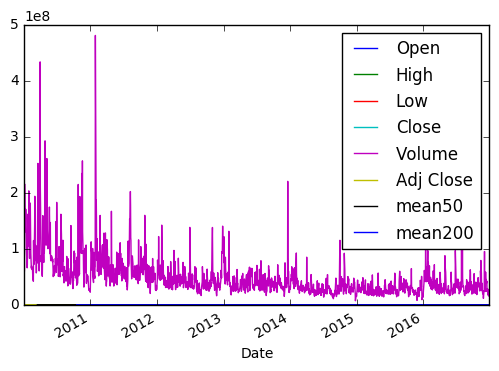

In [25]:
%matplotlib inline
yahoo_df.plot()

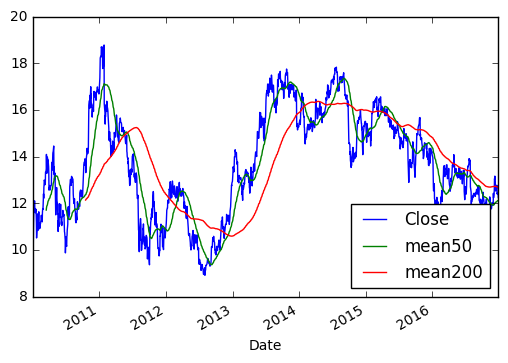

In [26]:
yahoo_df[['Close', 'mean50', 'mean200']].plot()